**Importamos todo lo necesario**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**importamos el csv, para este elegi el de corredores**

In [30]:
df = pd.read_csv('corredores.csv')
df

,Unnamed: 0,place,gender,age,home,time,Velocidad
0,3475,3592,Male,52,GBR,217.483333,Regular
1,13594,13853,Female,40,NY,272.550000,Regular
2,12012,12256,Male,31,FRA,265.283333,Regular
3,10236,10457,Female,33,MI,256.150000,Regular
4,9476,9686,Male,33,NY,252.250000,Regular
...,...,...,...,...,...,...,...
995,15972,16261,Male,61,FRA,285.883333,Regular
996,1090,1131,Male,37,GBR,191.916667,Veloz
997,16419,16713,Female,53,IRL,289.016667,Regular
998,13977,14241,Female,21,NY,276.050000,Regular


**Se elimina columna innecesaria**

In [31]:
df = df.drop(columns= 'Unnamed: 0')
df

,place,gender,age,home,time,Velocidad
0,3592,Male,52,GBR,217.483333,Regular
1,13853,Female,40,NY,272.550000,Regular
2,12256,Male,31,FRA,265.283333,Regular
3,10457,Female,33,MI,256.150000,Regular
4,9686,Male,33,NY,252.250000,Regular
...,...,...,...,...,...,...
995,16261,Male,61,FRA,285.883333,Regular
996,1131,Male,37,GBR,191.916667,Veloz
997,16713,Female,53,IRL,289.016667,Regular
998,14241,Female,21,NY,276.050000,Regular


**Controlamos los valores nulos**
*si es que estos existen*

In [32]:
df.isnull().values.any()

True

In [33]:
df.isnull().sum().sum()

1

In [34]:
nan_rows = df[df.isnull().any(1)]
nan_rows

<ipython-input-34-1d75c7dbdb71>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nan_rows = df[df.isnull().any(1)]


,place,gender,age,home,time,Velocidad
249,18589,Male,5,NaN,302.683333,Lento


**Por lo que vimos, existe un solo valor vacío, el cual está en el hogar del corredor 249**

*En otros csv´s los NaN suelen ser numeros, entonces se pueden reemplazar por la media, pero aqui el valor faltante es un string, además de ser solo una fila asi que se decidió eliminar la única fila con ese error*

In [35]:
df = df.dropna(subset=["home"])
df

,place,gender,age,home,time,Velocidad
0,3592,Male,52,GBR,217.483333,Regular
1,13853,Female,40,NY,272.550000,Regular
2,12256,Male,31,FRA,265.283333,Regular
3,10457,Female,33,MI,256.150000,Regular
4,9686,Male,33,NY,252.250000,Regular
...,...,...,...,...,...,...
995,16261,Male,61,FRA,285.883333,Regular
996,1131,Male,37,GBR,191.916667,Veloz
997,16713,Female,53,IRL,289.016667,Regular
998,14241,Female,21,NY,276.050000,Regular


In [36]:
df.isnull().values.any()

False

**Con los nulos aliminados, se separan las variables independientes de las dependientes**

In [37]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.shape


(999, 6)

In [38]:
X, y


(array([[3592, 'Male', 52, 'GBR', 217.4833333],
        [13853, 'Female', 40, 'NY', 272.55],
        [12256, 'Male', 31, 'FRA', 265.2833333],
        ...,
        [16713, 'Female', 53, 'IRL', 289.0166667],
        [14241, 'Female', 21, 'NY', 276.05],
        [8726, 'Male', 55, 'GER', 240.9666667]], dtype=object),
 array(['Regular', 'Regular', 'Regular', 'Regular', 'Regular', 'Regular',
        'Regular', 'Regular', 'Regular', 'Lento', 'Regular', 'Regular',
        'Regular', 'Regular', 'Veloz', 'Regular', 'Regular', 'Regular',
        'Regular', 'Regular', 'Regular', 'Regular', 'Lento', 'Lento',
        'Lento', 'Regular', 'Regular', 'Regular', 'Regular', 'Regular',
        'Veloz', 'Lento', 'Regular', 'Regular', 'Regular', 'Regular',
        'Regular', 'Regular', 'Regular', 'Veloz', 'Regular', 'Regular',
        'Regular', 'Regular', 'Regular', 'Regular', 'Lento', 'Regular',
        'Regular', 'Veloz', 'Regular', 'Lento', 'Lento', 'Regular',
        'Lento', 'Regular', 'Lento', 'Regul

**Se cambian los datos de tipo string por enteros (género, pais y velocidad)**

In [39]:
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
X

array([[3592, 1, 52, 23, 217.4833333],
       [13853, 0, 40, 50, 272.55],
       [12256, 1, 31, 20, 265.2833333],
       ...,
       [16713, 0, 53, 29, 289.0166667],
       [14241, 0, 21, 50, 276.05],
       [8726, 1, 55, 24, 240.9666667]], dtype=object)

In [40]:
labelencoder_X = LabelEncoder()
y = labelencoder_X.fit_transform(y)
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0,
       1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1,

*Separamos los datos que usaremos para entrenar la maquina y los datos que usaremos para probarla*

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [42]:
X_train

array([[517, 1, 32, 62, 177.7166667],
       [17939, 0, 45, 47, 293.85],
       [19413, 1, 35, 47, 305.2333333],
       ...,
       [11471, 1, 31, 50, 259.7333333],
       [11255, 1, 32, 50, 260.4833333],
       [17773, 1, 28, 59, 295.4]], dtype=object)

In [43]:
y_train

array([2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1,
       0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1,

*se entrena la máquina*

In [44]:
regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

*probamos si funciona*

In [45]:
y_pred = regression.predict(X_test)
y_pred


array([ 1.01644857,  0.36544261,  1.08467657,  0.62298082, -0.52913152,
        1.2356716 ,  1.24840276,  1.58832042,  0.31402128,  0.51290952,
        1.39951734,  0.01991902,  0.93089784,  0.98588173,  0.67827422,
        1.33128443,  0.41815939,  1.00911849,  0.9981644 ,  0.69904694,
        0.75884994,  0.2959018 ,  0.57229733,  1.21911911,  1.55204981,
        0.45942893,  1.63988293,  1.05554821,  0.35964378,  0.9003211 ,
        0.93351939,  0.80200734,  1.03789966,  0.82684507,  0.78742143,
        0.40616781,  0.66628643,  0.00168987,  0.92166824, -0.37303545,
        0.85183722,  0.78632048,  1.01174647,  0.74177806,  0.8964141 ,
        0.519718  ,  0.56760847,  1.04903681,  1.07385953,  0.62018514,
        1.38705681,  0.32282757,  0.69332968,  0.72249789,  0.95667176,
        1.11422056,  0.9170691 ,  0.36137992,  1.10758918,  0.58276598,
        1.11083401,  1.08127256,  1.16784521,  1.45955908,  0.83087399,
        1.23018617,  1.0072131 ,  1.48450002,  0.04669883,  1.08

*se redondea el resultado ya que sino siempre dará un resultado decimal*

In [46]:
y_pred = y_pred.round(decimals=0, out=None)
y_pred

array([ 1.,  0.,  1.,  1., -1.,  1.,  1.,  2.,  0.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  2.,  0.,
        2.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,
       -0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -0.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        0.,  1., -0.,  1.,  1.,  0.,  0.,  1.,  1.,  2.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  2.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  0., -0.,  1.,  0.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1

**ahora comparemos los datos con lo que dió**

In [ ]:
df_aux = pd.DataFrame({'Actual': y_test.flatten(), 'Predicción': y_pred.flatten()})
df_aux

**graficamos la diferencia**

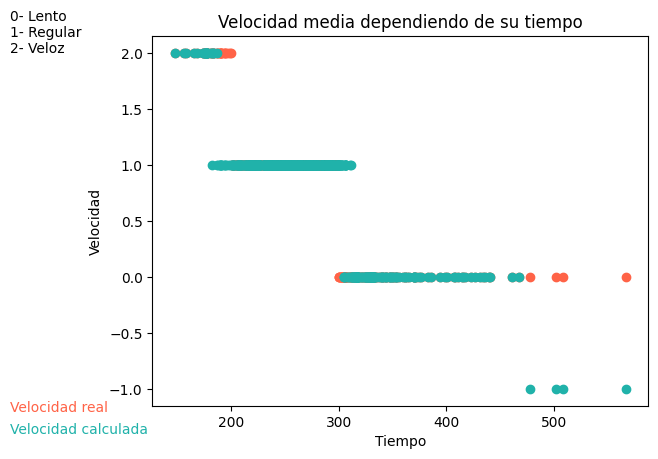

In [61]:
plt.scatter(X_train[:,-1], y_train, color = "#FF6347")
plt.scatter(X_train[:,-1], regression.predict(X_train).round(decimals=0, out=None), color = "#20B2AA")
plt.title("Velocidad media dependiendo de su tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Velocidad")
plt.text(-6,2,"0- Lento \n1- Regular \n2- Veloz")
plt.text(-6,-1.2,"Velocidad real", color = "#FF6347")
plt.text(-6,-1.4,"Velocidad calculada", color = "#20B2AA")
plt.show()


Intercepción del modelo:

In [62]:
regression.intercept_

2.4714915862620845

Pendiente del modelo:

In [63]:
regression.coef_

array([-1.76147718e-05, -1.72582095e-03,  2.18228368e-03,  2.78189078e-04,
       -5.61403679e-03])

Error cuantico medio:

In [64]:
metrics.mean_squared_error(y_test, y_pred)

0.06306306306306306

Raiz cuadrada del error cuantico medio:

In [65]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.2511236011669613

Error medio absoluto:

In [66]:
metrics.mean_absolute_error(y_test, y_pred)

0.06306306306306306

Error absoluto Medio:

In [67]:
metrics.median_absolute_error(y_test, y_pred)

0.0

R^2 del modelo:

In [68]:
metrics.r2_score(y_test, y_pred)

0.7604480679638257

# **Conclución**

Una persona es considerada veloz si su tiempo es menor a los 200 minutos y considerada lenta si pasó los 300 minutos